In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2

from jupyterthemes import jtplot
jtplot.style()

Populating the interactive namespace from numpy and matplotlib


In [2]:
import os, sys, time
import cPickle as pickle
sys.path.append('../EXP/')
import ClevelandMcGill as C
reload(C)

<module 'ClevelandMcGill' from '../EXP/ClevelandMcGill/__init__.pyc'>

In [3]:
data, labels = C.Figure4.generate_datapoint()
print 'Data', data
print 'Labels', labels

Data [38.0, 10.0]
Labels 0.263157894737


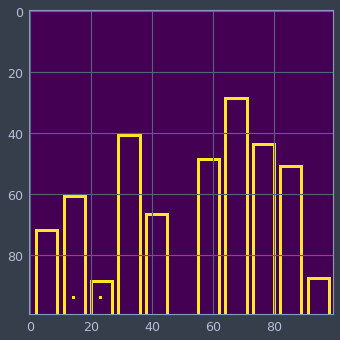

In [4]:
imshow(C.Figure4.data_to_type1(data))

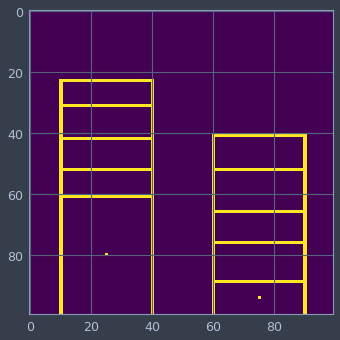

In [5]:
imshow(C.Figure4.data_to_type2(data))

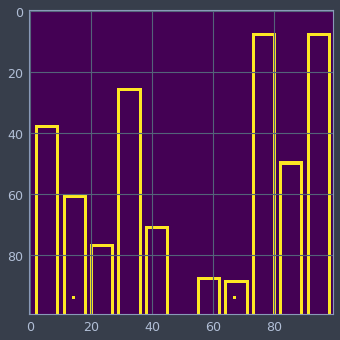

In [6]:
imshow(C.Figure4.data_to_type3(data))

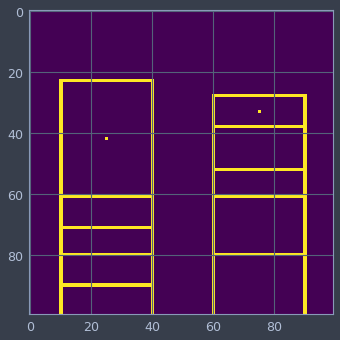

In [7]:
imshow(C.Figure4.data_to_type4(data))

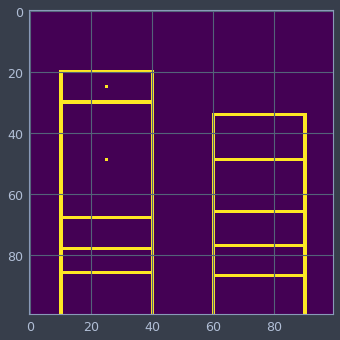

In [8]:
imshow(C.Figure4.data_to_type5(data))

In [26]:
pairs = [10. * 10.**((i-1.)/12.) for i in range(1,11)]

In [29]:
pairs

[10.0,
 12.115276586285884,
 14.677992676220695,
 17.78279410038923,
 21.54434690031884,
 26.10157215682537,
 31.622776601683796,
 38.31186849557288,
 46.415888336127786,
 56.234132519034915]

In [30]:
#
# create many
#

# DATATYPE = eval('C.Figure4.data_to_type4')

def DATATYPE(data):
  '''
  '''
  
#   print 'tst'
  choices = ['C.Figure4.data_to_type1', 'C.Figure4.data_to_type2',\
            'C.Figure4.data_to_type3', 'C.Figure4.data_to_type4', 'C.Figure4.data_to_type5']

  choice = np.random.choice(choices)
  
#   print choice
  
  return eval(choice)(data)

  
  
NOISE = True

train_counter = 0
val_counter = 0
test_counter = 0
train_target = 60000
val_target = 20000
test_target = 20000

train_labels = []
val_labels = []
test_labels = []


X_train = np.zeros((train_target, 100, 100), dtype=np.float32)
y_train = np.zeros((train_target, 1), dtype=np.float32)

X_val = np.zeros((val_target, 100, 100), dtype=np.float32)
y_val = np.zeros((val_target, 1), dtype=np.float32)

X_test = np.zeros((test_target, 100, 100), dtype=np.float32)
y_test = np.zeros((test_target, 1), dtype=np.float32)

t0 = time.time()

all_counter = 0
while train_counter < train_target or val_counter < val_target or test_counter < test_target:
  
  all_counter += 1
  
  data, label = C.Figure4.generate_datapoint()
#   print data
  pot = np.random.choice(3)
  
  # sometimes we know which pot is right
  if label in train_labels:
    pot = 0
  if label in val_labels:
    pot = 1
  if label in test_labels:
    pot = 2
  
  if pot == 0 and train_counter < train_target:
    
    #
    try:
      image = DATATYPE(data)
      image = image.astype(np.float32)
    except:
      continue
      
    if label not in train_labels:
      train_labels.append(label)
      
    # add noise?
    if NOISE:
      image += np.random.uniform(0, 0.05,(100,100))
      
    # safe to add to training
    X_train[train_counter] = image
    y_train[train_counter] = label
    train_counter += 1
    
  elif pot == 1 and val_counter < val_target:

    #
    try:
#       print 'hereh'
      image = DATATYPE(data)
      image = image.astype(np.float32)
    except:
#       print 'wrong22'
      continue
    
    if label not in val_labels:
      val_labels.append(label)
      
    # add noise?
    if NOISE:
      image += np.random.uniform(0, 0.05,(100,100))
      
    # safe to add to training
    X_val[val_counter] = image
    y_val[val_counter] = label
    val_counter += 1
    
  elif pot == 2 and test_counter < test_target:

    #
    try:
      image = DATATYPE(data)
      image = image.astype(np.float32)
    except:
      continue
    
    if label not in test_labels:
      test_labels.append(label)
      
    # add noise?
    if NOISE:
      image += np.random.uniform(0, 0.05,(100,100))
      
    # safe to add to training
    X_test[test_counter] = image
    y_test[test_counter] = label
    test_counter += 1
    
print 'Done', time.time()-t0


Done 82.364552021


[ 0.2173913]


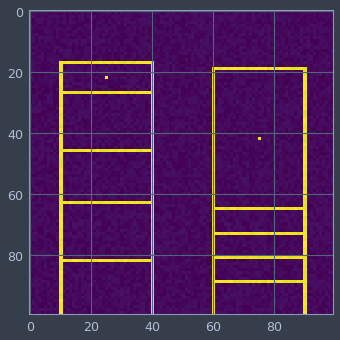

In [29]:
imshow(X_train[4])
print y_train[4]

[ 0.66666669]


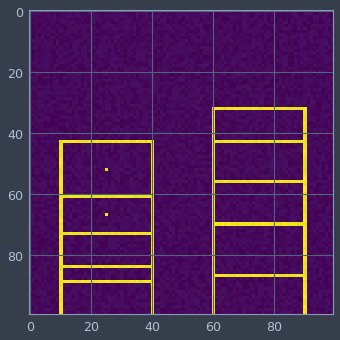

In [61]:
which = np.random.randint(len(X_train))
print y_train[which]
imshow(X_train[which])

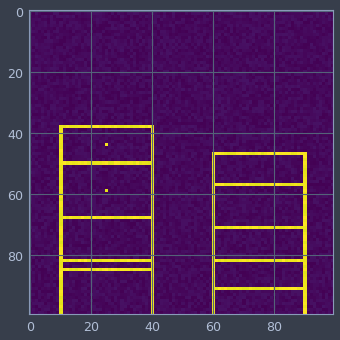

In [62]:
imshow(X_train[-1])

In [67]:
y_train[-1]

array([ 0.66666669], dtype=float32)